In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('file path directory')
df_copy1 = df.copy()
df_copy1[['director', 'cast', 'country', 'date_added']] = df_copy1[['director', 'cast', 'country', 'date_added']].fillna('Unknown')
df_copy1['rating'] = df_copy1['rating'].fillna('Unrated')

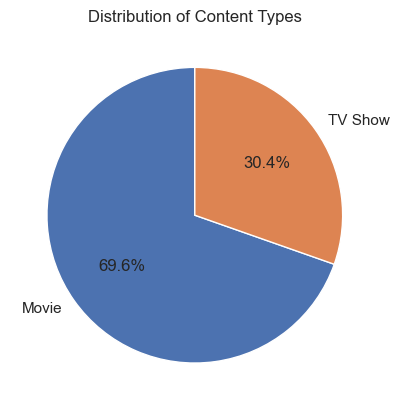

In [15]:
content_type_counts = df_copy1['type'].value_counts()

plt.pie(content_type_counts.values, labels=content_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Content Types')
plt.show()

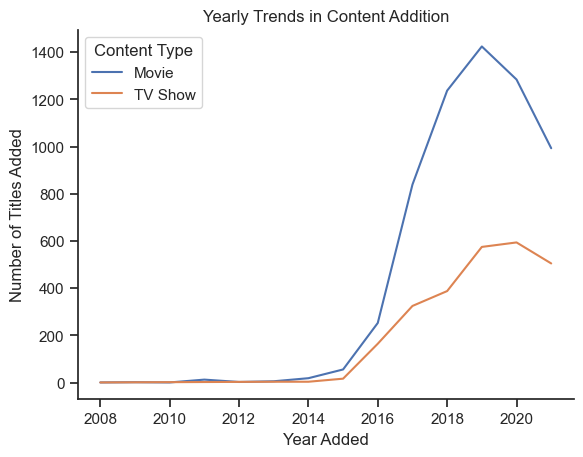

In [16]:
df_copy1['year_added'] = pd.to_datetime(df_copy1['date_added'], errors='coerce').dt.year
yearly_trends = df_copy1.groupby(['year_added', 'type']).size().reset_index(name='count')

sns.set_theme(style='ticks')
sns.lineplot(data=yearly_trends, x='year_added', y='count', hue='type')
sns.despine()
plt.title('Yearly Trends in Content Addition')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.show()

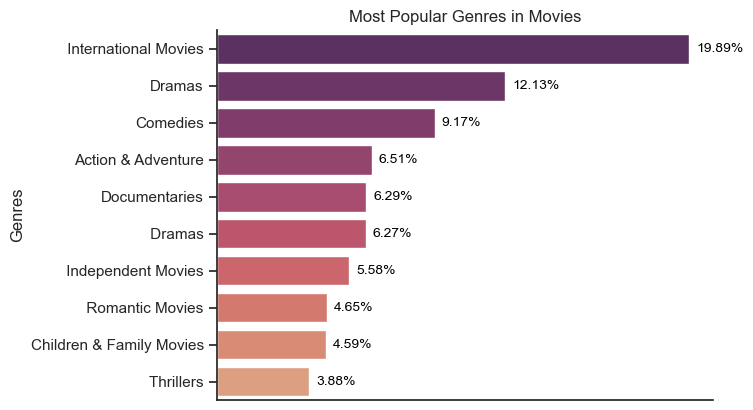

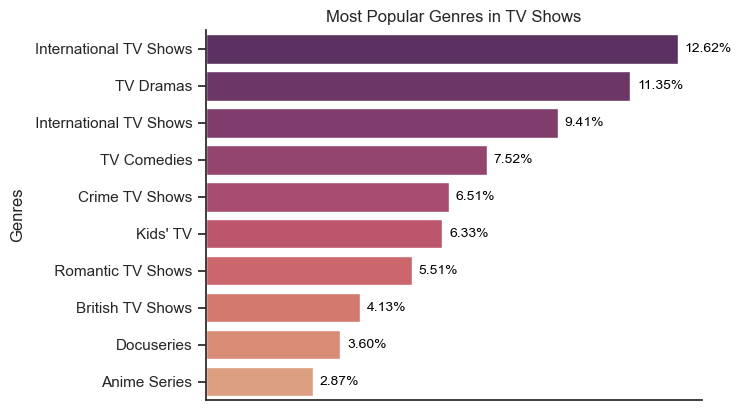

In [50]:
df_copy1['genres'] = df_copy1['listed_in'].str.split(',')

exploded_genres = df_copy1.explode('genres')
genre_counts = exploded_genres.groupby(['type', 'genres']).size().reset_index(name='count')

total_counts = genre_counts.groupby('type')['count'].transform('sum')

genre_counts['percentage'] = (genre_counts['count'] / total_counts) * 100

top_10_movies_genre = genre_counts[genre_counts['type'] == 'Movie'].sort_values(by='percentage', ascending=False).head(10)
top_10_tvshows_genre = genre_counts[genre_counts['type'] == 'TV Show'].sort_values(by='percentage', ascending=False).head(10)

sns.set_theme(style='ticks')
ax = sns.barplot(data=top_10_movies_genre, x='percentage', y='genres', hue='genres', palette='flare_r', legend=False)
plt.title("Most Popular Genres in Movies")
plt.xlabel('')
plt.ylabel('Genres')
plt.xticks([])

for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                xytext=(5, 0), 
                textcoords='offset points', 
                ha='left', 
                va='center', 
                fontsize=10, 
                color='black')

sns.despine()
plt.show()

sns.set_theme(style='ticks')
ax = sns.barplot(data=top_10_tvshows_genre, x='percentage', y='genres', hue='genres', palette='flare_r', legend=False)
plt.title("Most Popular Genres in TV Shows")
plt.xlabel('')
plt.ylabel('Genres')
plt.xticks([])

for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                xytext=(5, 0), 
                textcoords='offset points', 
                ha='left', 
                va='center', 
                fontsize=10, 
                color='black')

sns.despine()
plt.show()



In [18]:
def extract_numeric_duration(row):
    if pd.isnull(row['duration']):
        return 0  # Assign 0 if duration is missing
    elif 'Season' in row['duration']:
        # Extract the number of seasons
        return int(row['duration'].split()[0])
    elif 'min' in row['duration']:
        # Extract the number of minutes
        return int(row['duration'].split()[0])
    else:
        return 0  # Assign 0 for unexpected formats


df_copy1['numeric_duration'] = df_copy1.apply(extract_numeric_duration, axis=1)


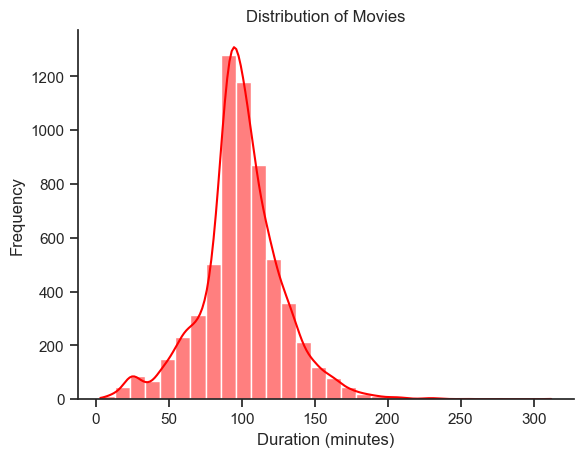

In [51]:
movies_duration = df_copy1[(df_copy1['type'] == 'Movie') & (df_copy1['numeric_duration'] > 0)]['numeric_duration']

sns.set_theme(style='ticks')
sns.histplot(movies_duration, bins=30, kde=True, color='red')
plt.title("Distribution of Movies")
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
sns.despine()
plt.show()

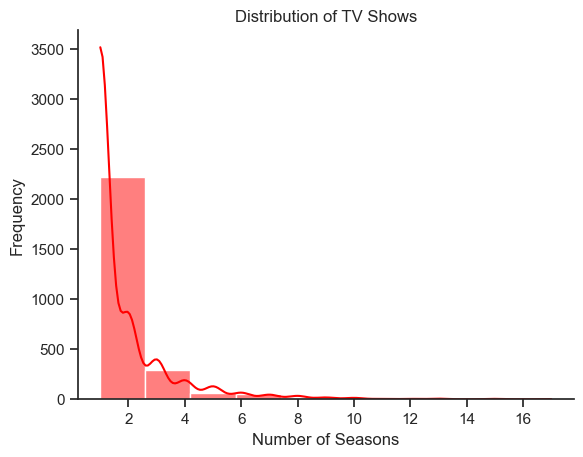

In [52]:
tvshow_duration = df_copy1[(df_copy1['type'] == 'TV Show') & (df_copy1['numeric_duration'] > 0)]['numeric_duration']

sns.set_theme(style='ticks')
sns.histplot(tvshow_duration, bins=10, kde=True, color='red')
plt.title("Distribution of TV Shows")
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
sns.despine()
plt.show()

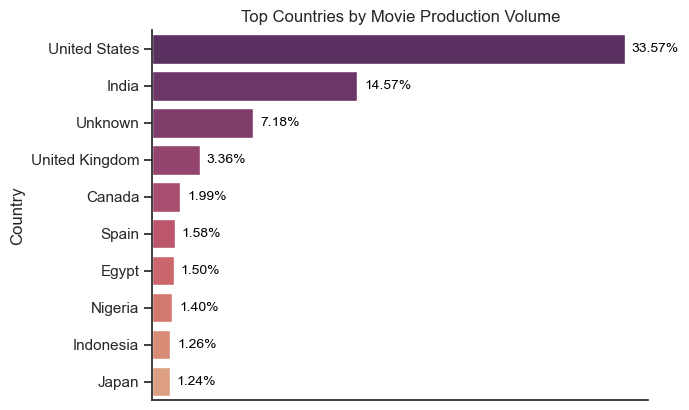

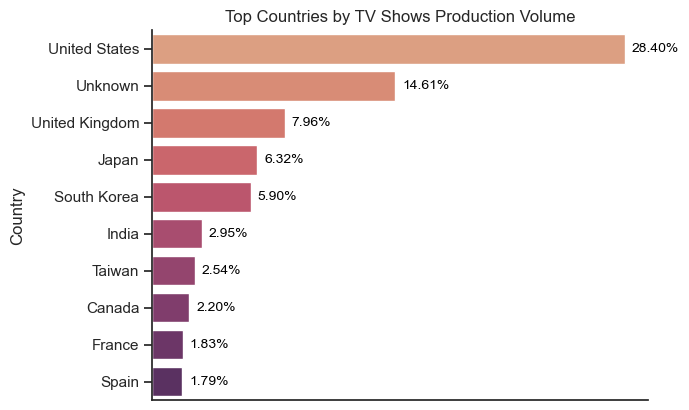

In [55]:
country_content = df_copy1.groupby(['country', 'type']).size().reset_index(name='count')

total_country_counts = country_content.groupby('type')['count'].transform('sum')

country_content['percentage'] = (country_content['count'] / total_country_counts) * 100

top_country_movies = country_content[country_content['type'] == 'Movie'].sort_values(by='percentage', ascending=False).head(10)
top_country_tvshows = country_content[country_content['type'] == 'TV Show'].sort_values(by='percentage', ascending=False).head(10)

ax = sns.barplot(data=top_country_movies, x='percentage', y='country', hue='country', palette='flare_r')
plt.title("Top Countries by Movie Production Volume")
plt.xlabel("")
plt.ylabel("Country")
plt.xticks([])

for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                xytext=(5, 0), 
                textcoords='offset points', 
                ha='left', 
                va='center', 
                fontsize=10, 
                color='black')

sns.despine()
plt.show()

ax = sns.barplot(data=top_country_tvshows, x='percentage', y='country', hue='country', palette='flare')
plt.title("Top Countries by TV Shows Production Volume")
plt.xlabel("")
plt.ylabel("Country")
plt.xticks([])

for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                xytext=(5, 0), 
                textcoords='offset points', 
                ha='left', 
                va='center', 
                fontsize=10, 
                color='black')

sns.despine()
plt.show()


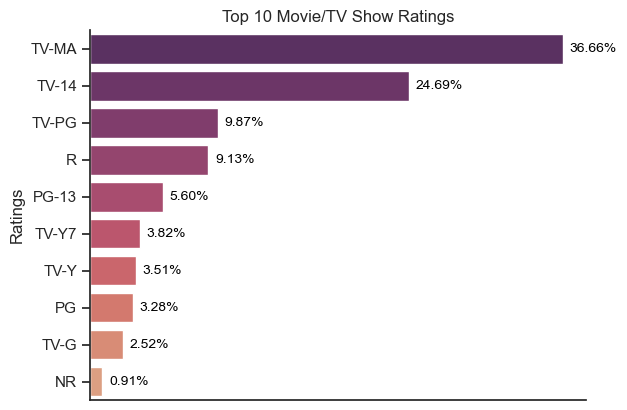

In [ ]:
ratings_dist = df_copy1['rating'].value_counts().reset_index(name='count').head(10)

total_ratings_count = ratings_dist['count'].sum()

ratings_dist['percentage'] = (ratings_dist['count'] / total_ratings_count) * 100

ax = sns.barplot(data=ratings_dist, x='percentage', y='rating', hue='rating', palette='flare_r')
plt.title("Rating Popularity in Movies and TV Shows")
plt.xlabel("")
plt.ylabel("Ratings")
plt.xticks([])

for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                xytext=(5, 0), 
                textcoords='offset points', 
                ha='left', 
                va='center', 
                fontsize=10, 
                color='black')

sns.despine()
plt.show()


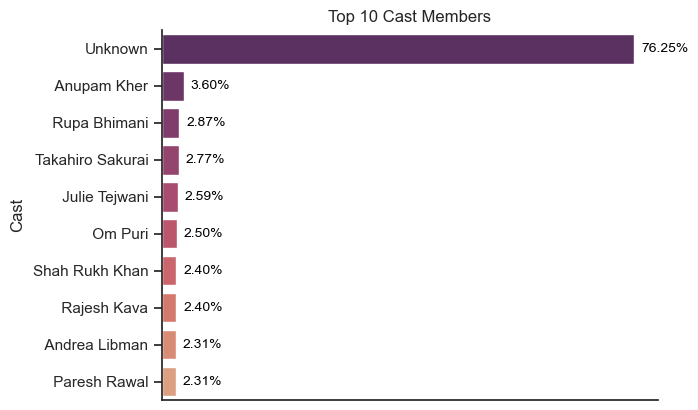

In [58]:
cast = df_copy1['cast'].str.split(',').explode()

top_cast = cast.value_counts().reset_index(name='count').head(10)

total_cast_count = top_cast['count'].sum()

top_cast['percentage'] = (top_cast['count'] / total_cast_count) * 100

ax = sns.barplot(data=top_cast, x='percentage', y='cast', hue='cast', palette='flare_r')
plt.title("Most Frequent Cast Members in Movies/TV Shows")
plt.xlabel("")
plt.ylabel("Cast")
plt.xlim(0, 80)  # Limiting x-axis to 100% for clarity
plt.xticks([])

for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                xytext=(5, 0), 
                textcoords='offset points', 
                ha='left', 
                va='center', 
                fontsize=10, 
                color='black')

sns.despine()
plt.show()


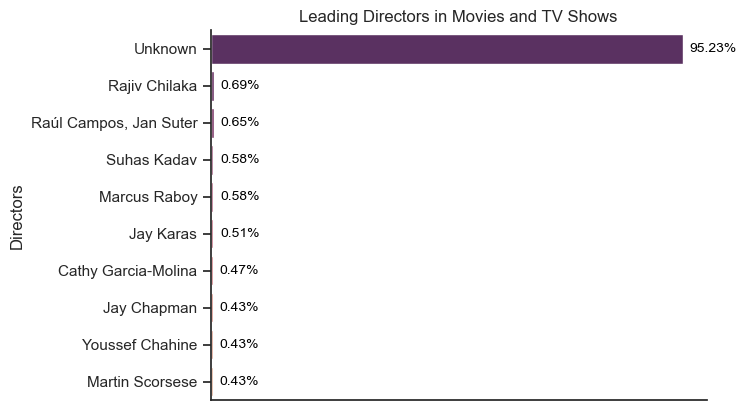

In [63]:
top_directors = df_copy1['director'].value_counts().reset_index(name='count').head(10)

total_directors_count = top_directors['count'].sum()

top_directors['percentage'] = (top_directors['count'] / total_directors_count) * 100

ax = sns.barplot(data=top_directors, x='percentage', y='director', hue='director', palette='flare_r')
plt.title("Leading Directors in Movies and TV Shows")
plt.xlabel("")
plt.ylabel("Directors")
plt.xlim(0, 100)  # Limiting x-axis to 100% for clarity
plt.xticks([])

for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                xytext=(5, 0), 
                textcoords='offset points', 
                ha='left', 
                va='center', 
                fontsize=10, 
                color='black')

sns.despine()
plt.show()

